<a href="https://colab.research.google.com/github/deekshaaj05/1RV23BT001---Bioinformatics-Lab/blob/main/1RV23BT001_Exp_9_Functional_annotation_of_protein_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [ ]:
blast_file = "blast_output.txt"

with open(blast_file) as f:
    blast_lines = f.readlines()

In [ ]:
hits = []

for line in blast_lines:
    if ">" in line:
        hits.append(line.strip())

In [ ]:
annotations = []

for hit in hits:
    # Protein name
    if "Full=" in hit:
        protein_name = hit.split("Full=")[1].split(" OS=")[0]
    else:
        protein_name = "Unknown Protein"

    # Organism name
    if "OS=" in hit:
        organism = hit.split("OS=")[1].split(" OX=")[0]
    else:
        organism = "Unknown"

    annotations.append((protein_name, organism))

In [ ]:
functions = []

for hit in hits:
    if "oxidase" in hit.lower():
        functions.append("Oxidoreductase")
    elif "kinase" in hit.lower():
        functions.append("Kinase")
    else:
        functions.append("General Protein")

In [ ]:
protein_data = []

for i in range(len(annotations)):
    protein_data.append({
        "Protein": annotations[i][0],
        "Organism": annotations[i][1],
        "Function": functions[i]
    })

protein_data[:3]

[{'Protein': 'Cytochrome c oxidase subunit 1; AltName: ',
  'Organism': 'Unknown',
  'Function': 'Oxidoreductase'},
 {'Protein': 'Cytochrome c oxidase subunit 1; AltName: ',
  'Organism': 'Unknown',
  'Function': 'Oxidoreductase'},
 {'Protein': 'Cytochrome c oxidase subunit 1; AltName: ',
  'Organism': 'Unknown',
  'Function': 'Oxidoreductase'}]

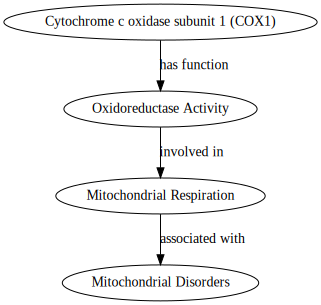

In [ ]:
from graphviz import Digraph

dot = Digraph(comment="Protein Functional Annotation")

dot.node("P", "Cytochrome c oxidase subunit 1 (COX1)")
dot.node("F", "Oxidoreductase Activity")
dot.node("B", "Mitochondrial Respiration")
dot.node("D", "Mitochondrial Disorders")

dot.edge("P", "F", label="has function")
dot.edge("F", "B", label="involved in")
dot.edge("B", "D", label="associated with")

dot

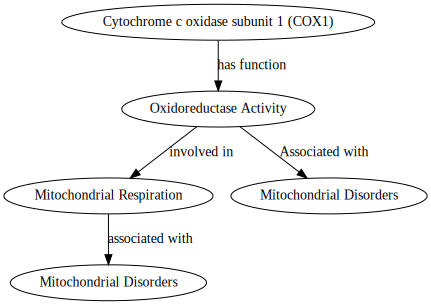

In [ ]:
dot.node("D1", "Mitochondrial Disorders")
dot.edge("F", "D1", label="Associated with")
dot